<a href="https://colab.research.google.com/github/ninowwwup/Project_2_Walmart/blob/main/Project_2_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Projeto Walmart 

Analista: Francisco de Lima Silva

RID #57320



# **🔶Business Understanding (Entendimento de Negócio)**
 





1. **Avaliando a Situação / Background do Projeto**







> Walmart, Inc., é uma multinacional estadunidense de lojas de
departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972.
No ano de 2021, obteve um um lucro de $13.51 Bilhões. Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. 

> O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.










---



2. **Objetivo de Negócio**




> A Walmart solicita um levantamento do faturamento das lojas nos USA e apontar qual loja seria mellhor pra expandior seu tamanho.






---



3. **Objetivos e metas para a Mineração dos Dados (Determine Data Mining Goals)**

✅  *Qual o preço médio de venda semanal por loja?;*

✅  *Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido);*

✅  *Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?;*

✅  *Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.*

✅  *Pensando na expansão de uma das lojas, que loja você escolheria e o por que?*

✅  *Pra cada uma das Lojas qual tem o Coeficiente maior (Com maior tendência de Crescimento)*


4. **Critério de Sucesso**



> Apontar preditivamente quais lojas meu cliente deverá **expandir** com base na anáises dos dados de vendas





# **🔶Data Understanding (Entendimento dos Dados)**
 





1. **Coleta Inicial dos Dados (Collect Initial Data)**

Os dataset utilizado para análise foi coletado no site: https://www.kaggle.com/yasserh/walmart-dataset

2. **Descrição dos Dados (Describe data)**

- Os dados coletados são do tipo (**.csv**).

- Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em **45 lojas**
varejistas da rede Walmart e também algumas métricas econômicas e
meteorológicas por semana 

- Tem um total de *6435 registros com um total
de 8 atributos* 



3. **Exploração dos Dados (Explore Data)**



- Visualização dos Dados
- Estatística Simples
- Relatório da Exploração dos Dados (Data Exploration Report)



---



## 🔸Preparação e Visualização do Dataset

Bibliotecas

In [1]:
# Importando as libs

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.preprocessing import scale

In [2]:
# Customização dos gráficos

sns.set_theme(context='talk', font_scale=.8, style='ticks', rc={
    'figure.figsize':(14,8)
})

# Análise Introdutória

In [3]:
# Importando o dataset 


df = pd.read_csv('/content/Walmart.csv', parse_dates=['Date']) # Transformando a coluna date para datetime
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [42]:
# Import dataset

df = pd.read_csv('/content/Walmart.csv')

# Checando os registros do dataset
p = '-'
print(f'{p:->25}')
print(f'-> Nº de Registros: {df.shape[0]}')
print(f'-> Nº de Colunas: {df.shape[1]}')
print(f'{p:->25}')

-------------------------
-> Nº de Registros: 6435
-> Nº de Colunas: 8
-------------------------


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
# Verificando se há presensça de dados nulos

df.isna().any() 

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [6]:
# Verificando se há dados duplicados

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

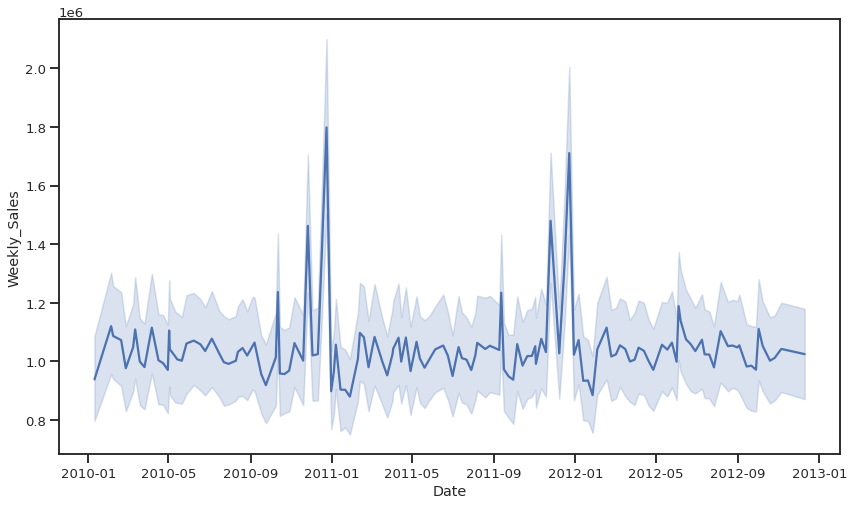

In [7]:
sns.lineplot(data=df, x='Date', y='Weekly_Sales');

Perguntas Importantes (Data Minig Goal)

# 1. ✅Qual é preço médio das vendas semanais por loja?

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [21]:
df_store_total = df.groupby('Store').Weekly_Sales.mean().sort_values(ascending=False)
df_store_total.to_frame().style.format('{:,.2f}') #Tranformando em frame e estilizando a amostra

,Weekly_Sales
Store,
20,"2,107,676.87"
4,"2,094,712.96"
14,"2,020,978.40"
13,"2,003,620.31"
2,"1,925,751.34"
10,"1,899,424.57"
27,"1,775,216.20"
6,"1,564,728.19"
1,"1,555,264.40"


# 2. ✅Qual o atreibuto que tem maior correlação (positiva ou negativa) com o número de vendas?

In [10]:
# Utilizando a Correlação de Pearson

df.corr().loc['Weekly_Sales'].abs().sort_values(ascending=False)

Weekly_Sales    1.000000
Store           0.335332
Unemployment    0.106176
CPI             0.072634
Temperature     0.063810
Holiday_Flag    0.036891
Fuel_Price      0.009464
Name: Weekly_Sales, dtype: float64

- A maior correlação está associada a coluna Unemploymente já que a coluna store é uma coluna numéria categórica.

- Ou seja, quanto maior a taxa de desmprego menor são as vendas 

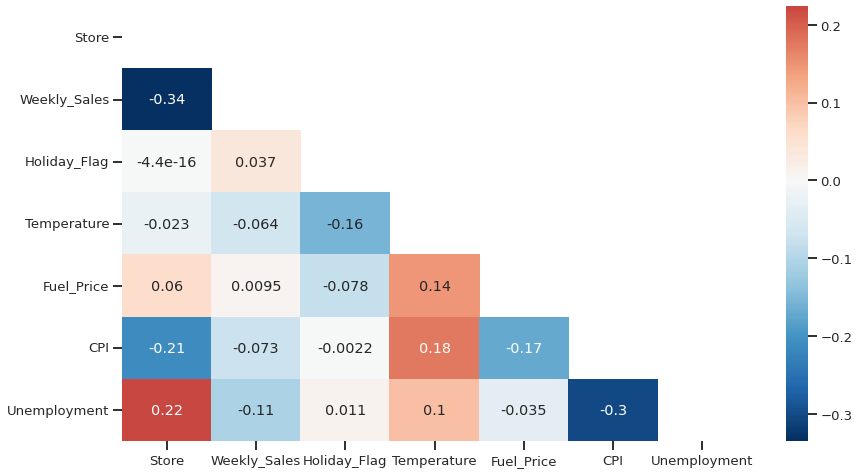

In [23]:
dfc = df.corr()

mask = np.zeros(dfc.shape).astype(bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dfc, annot=True, center=0, cmap='RdBu_r', mask=mask);

# 3. ✅Da loja com maior acumulo de vendas (soma de vendas de todo o períoo), quantas semanas do ano ele utrapassou a média do período.

In [12]:
# Buscando a loja com maior venda

target_store = df.groupby('Store').Weekly_Sales.sum().sort_values(ascending=False).index[0]
target_store

20

In [13]:
# Filtrando apenas as vendas da loja com maior venda

df_target_store = df.query('Store==@target_store')
df_target_store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-05-02,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-12-02,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,2010-05-03,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280
2856,20,2012-05-10,2246411.89,0,60.77,3.985,215.925886,7.293
2857,20,2012-12-10,2162951.36,0,47.20,4.000,216.115057,7.293
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293


In [14]:
# Média das vendas

target_store_mean = df_target_store.Weekly_Sales.mean()
df_target_store['Weekly_Sales_Mean'] = target_store_mean
df_target_store

<ipython-input-14-f8872c4426e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_store['Weekly_Sales_Mean'] = target_store_mean


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_Mean
2717,20,2010-05-02,2401395.47,0,25.92,2.784,204.247194,8.187,2.107677e+06
2718,20,2010-12-02,2109107.90,1,22.12,2.773,204.385747,8.187,2.107677e+06
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187,2.107677e+06
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187,2.107677e+06
2721,20,2010-05-03,2119213.72,0,31.75,2.777,204.494073,8.187,2.107677e+06
...,...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280,2.107677e+06
2856,20,2012-05-10,2246411.89,0,60.77,3.985,215.925886,7.293,2.107677e+06
2857,20,2012-12-10,2162951.36,0,47.20,4.000,216.115057,7.293,2.107677e+06
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293,2.107677e+06


In [15]:
# calculando a frequencia de quantas veezes a loja utrapassou a média do número de vendas por semana

(df_target_store.Weekly_Sales > target_store_mean).sum()

52

# 4. ✅Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de  feriaidos mencionados acima.

In [16]:
# Transformando o tipo de dado das infos sobre feriados

holiday_dict = {
  'Super_Bowl': [ '12-Feb-10', '11-Feb-11', '10-Feb-12' ],
  'Labour_Day': [ '10-Sep-10', '09-Sep-11', '07-Sep-12' ],
  'Thanksgiving': ['26-Nov-10', '25-Nov-11', '23-Nov-12' ],
  'Christmas': [ '31-Dec-10', '30-Dec-11', '28-Dec-12' ]
}

holiday_dict_datetime = {k: pd.to_datetime(v, format='%d-%b-%y') for k,v in holiday_dict.items()}
holiday_dict_datetime

{'Super_Bowl': DatetimeIndex(['2010-02-12', '2011-02-11', '2012-02-10'], dtype='datetime64[ns]', freq=None),
 'Labour_Day': DatetimeIndex(['2010-09-10', '2011-09-09', '2012-09-07'], dtype='datetime64[ns]', freq=None),
 'Thanksgiving': DatetimeIndex(['2010-11-26', '2011-11-25', '2012-11-23'], dtype='datetime64[ns]', freq=None),
 'Christmas': DatetimeIndex(['2010-12-31', '2011-12-30', '2012-12-28'], dtype='datetime64[ns]', freq=None)}

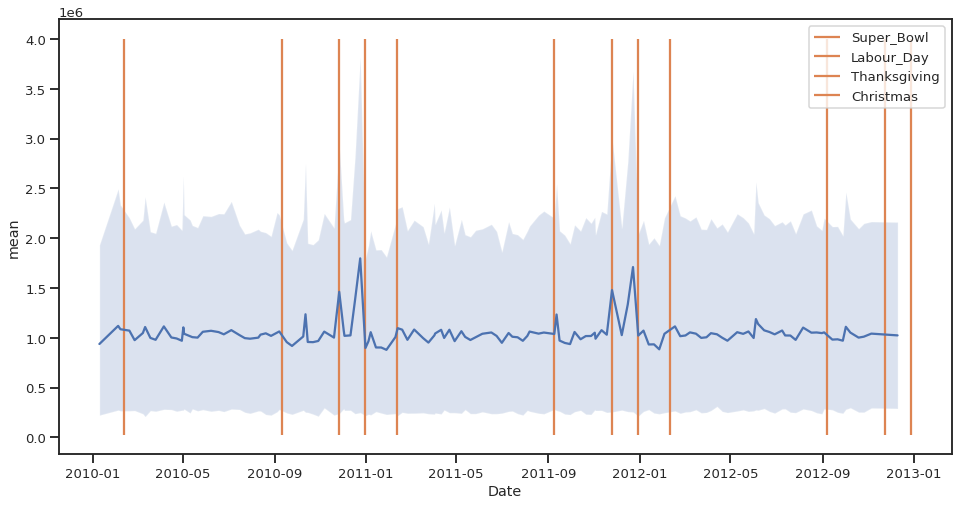

In [24]:
# Fazendo o agrupamento por semana

df_agg = df.groupby('Date')['Weekly_Sales'].agg(['min', 'max', 'mean']).reset_index()

plt.figure(figsize=(16,8))
ax = sns.lineplot(data=df_agg, x='Date', y='mean')
ax.fill_between(x=df_agg.Date, y1=df_agg['min'], y2=df_agg['max'], alpha=.2)

ymin,ymax = ax.get_ylim()

for i,(holiday,dates) in enumerate(holiday_dict_datetime.items()):
  ax.vlines(x=dates, ymin=ymin, ymax=ymax, label=holiday, color=f'C{1}')

plt.legend()
plt.show()

# 5. ✅Pensando na expansão de uma das lojas, que loja você escolheria e o por que?

In [18]:
df_sorted = df.sort_values(['Store', 'Date']).reset_index(drop=True)
df_sorted

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838
1,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
2,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-10-08,733037.32,0,78.65,3.722,191.162613,8.684
6431,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6432,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667
6433,45,2012-11-05,770487.37,0,61.24,3.889,190.976417,8.567


In [25]:
# Média Móvel

groups = df.groupby('Store')['Weekly_Sales']

df_sorted['trend'] = groups.transform(lambda x: scale(x.rolling(4*12, center=True).mean()))
df_sorted['id'] =  groups.cumcount() + 1

df_sorted

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,trend,id
0,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,NaN,1
1,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,NaN,2
2,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,NaN,3
3,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,NaN,4
4,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,NaN,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-10-08,733037.32,0,78.65,3.722,191.162613,8.684,NaN,139
6431,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,NaN,140
6432,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,NaN,141
6433,45,2012-11-05,770487.37,0,61.24,3.889,190.976417,8.567,NaN,142


In [27]:
# Mostrando como a coluna Weekly_Sales se comporta utiliazando a técnica de média móvel

px.line(df_sorted, x='Date', y='Weekly_Sales', color='Store')

- Percebemos que ao aplicar a técnica de Média Móvel, vemos uma diminuição dos ruidos e identificamos melhor a tendência dessa coluna utilizando filtro semanal de vendas

In [26]:
px.line(df_sorted, x='Date', y='trend', color='Store')

- Ao Observarmos esse gráfico isolado percebemos um acréscimo com tendência de alto de Jan 2011 à Mar 2012 da (da loja 20)

# 6. ✅Pra cada uma das Lojas qual tem o Coeficiente maior (Com maior tendência de Crescimento)

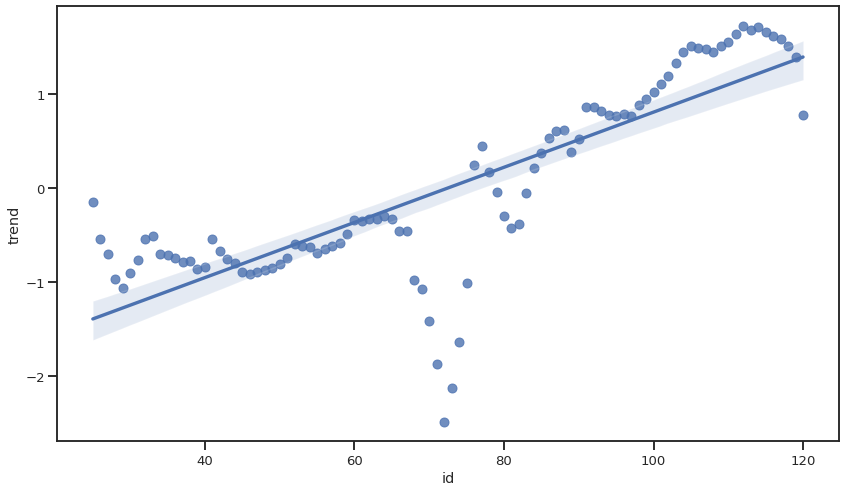

In [28]:
# Gráfico de regressão linear

sns.regplot(data=df_sorted.query('Store==20'), x='id', y='trend')

In [29]:
subdf = df_sorted.query('Store==20').dropna().copy()

np.polyfit(subdf.id,subdf.trend, deg=1)

array([ 0.02935057, -2.12791652])

In [33]:
def get_trend_coef(subdef):
  subdef = subdef.dropna()
  coef,intercept = np.polyfit(subdef.id, subdef.trend, deg=1)
  return coef

In [36]:
# Pra cada loja obtivemos o crescimento dela

coefs = df_sorted.groupby('Store').apply(get_trend_coef).sort_values(ascending=False)
coefs

Store
38    0.035784
42    0.035732
4     0.035614
41    0.035548
9     0.035454
44    0.035262
39    0.035221
37    0.035077
7     0.034883
17    0.034857
1     0.034560
32    0.034182
3     0.033896
5     0.033803
13    0.033639
12    0.032471
31    0.032431
11    0.032001
8     0.031941
40    0.030912
34    0.029732
20    0.029351
16    0.028554
26    0.028123
23    0.026681
45    0.022740
6     0.015234
33    0.010327
28    0.007628
25    0.007280
22    0.002134
24   -0.000899
2    -0.007350
10   -0.010401
29   -0.016552
18   -0.018336
43   -0.024181
19   -0.025214
30   -0.025752
21   -0.026276
35   -0.028216
15   -0.030771
27   -0.032786
14   -0.032827
36   -0.035987
dtype: float64

In [38]:
# Pegando apenas as 10 primeiras lojas com alta tendencia de crescimento

df_sorted[df_sorted.Store.isin(coefs.head(10).index)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,trend,id
429,4,2010-01-10,1842821.02,0,63.96,2.619,126.234600,7.127,NaN,1
430,4,2010-02-04,1979247.12,0,48.77,2.740,126.603484,7.896,NaN,2
431,4,2010-02-07,1881337.21,0,73.66,2.668,126.139200,7.372,NaN,3
432,4,2010-02-19,2049860.26,0,36.45,2.540,126.526286,8.623,NaN,4
433,4,2010-02-26,1925728.84,0,41.36,2.590,126.552286,8.623,NaN,5
...,...,...,...,...,...,...,...,...,...,...
6287,44,2012-10-08,333594.81,0,81.69,3.509,130.756161,5.407,NaN,139
6288,44,2012-10-19,323766.77,0,52.06,3.781,131.149968,5.217,NaN,140
6289,44,2012-10-26,361067.07,0,46.97,3.755,131.193097,5.217,NaN,141
6290,44,2012-11-05,341381.08,0,56.47,3.809,131.145333,5.621,NaN,142


In [39]:
px.line(df_sorted[df_sorted.Store.isin(coefs.head(10).index)], x='Date', y='trend', color='Store')

- Aqui temos as 10 lojas com maior coeficente de cressimento (Compensa investimento)

In [41]:
px.line(df_sorted[df_sorted.Store.isin(coefs.head(10).index)], x='Date', y='Weekly_Sales', color='Store')

= Observando o gráfico obtemos as lojas com melhores insights pra investimento, sendo as lojas de cima com maior fluxo de vendas e maior potencial. E as lojas de baixo precisando apenas de pequenos ajustes porém ainda asssim, com creciemnto em alta

In [40]:
px.line(df_sorted[df_sorted.Store.isin(coefs.tail(10).index)], x='Date', y='trend', color='Store')

- Em contra partida essas são as 10 lojas com piores coeficientes de queda (Não vale investimento)